In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

latent_vectors = pd.read_csv(
    "/Users/minlingzhou/Library/CloudStorage/OneDrive-DukeUniversity/vc/Summer/NarrativeNexus/data/latent_vector/latent_vectors_5.csv",
    header=None,
)

In [2]:
latent_vectors.rename(
    columns={0: "d0", 1: "d1", 2: "d2", 3: "d3", 4: "d4"}, inplace=True
)

In [3]:
latent_vectors

,d0,d1,d2,d3,d4
0,-3.795183,0.330126,-3.065162,-0.930737,-3.230841
1,-4.540903,-0.186621,-0.197622,1.868128,-4.527591
2,-5.385657,-2.320496,-4.145564,1.096804,-1.615107
3,-2.544352,1.825146,-0.812640,4.090239,3.297484
4,-2.537612,0.276029,3.807901,0.559974,-0.308866
...,...,...,...,...,...
595,-1.561392,5.190272,-0.049563,1.363981,0.157194
596,-1.561392,5.190271,-0.049564,1.363981,0.157195
597,2.318553,2.290906,0.120580,-0.960496,-5.078055
598,2.318552,2.290906,0.120580,-0.960495,-5.078054


In [4]:
lv = pd.DataFrame(latent_vectors)

In [5]:
lv["topic"] = (
    ["Gaza"] * 100
    + ["India Election"] * 100
    + ["South China Sea Dispute"] * 100
    + ["India Election"] * 100
    + ["Gaza"] * 100
    + ["South China Sea Dispute"] * 100
)

In [6]:
import pandas as pd

# Set the display option to None (no limit)
pd.set_option("display.max_colwidth", None)

In [7]:
import json
import pandas as pd


def extract_answers(file, n=100):
    with open(file) as f:
        data = json.load(f)
    # Initialize a list to store the extracted values
    summary = []
    for item in data:

        if "answers" in item:
            s = list(item["answers"].values())
            summary.append(s)
    return summary[:n]


# read the summary from json file
answers = []
file_list = pd.read_csv(
    "/Users/minlingzhou/Library/CloudStorage/OneDrive-DukeUniversity/vc/Summer/NarrativeNexus/data/meta_data/QnA_file_list.csv"
)
for file in file_list["file_name"]:
    s = extract_answers(
        "/Users/minlingzhou/Library/CloudStorage/OneDrive-DukeUniversity/vc/Summer/NarrativeNexus/data/QnA_data/"
        + file
    )
    answers = answers + s

In [8]:
# convert the summary a numpy array of 600 * 80
answers = np.array(answers)
answers.shape

(600, 80)

In [9]:
lv["answers"] = answers.tolist()

In [10]:
def get_intersection(lv, column, top_n):
    top_n_summary = lv.sort_values(by=column, ascending=False).head(top_n)["answers"]
    top_n_summary_list = top_n_summary.to_list()
    top_n_summary_list = [list(i) for i in zip(*top_n_summary_list)]
    top_n_summary_unique = [(set(i)) for i in top_n_summary_list]

    bottom_n_summary = lv.sort_values(by=column, ascending=True).head(top_n)["answers"]
    bottom_n_summary_list = bottom_n_summary.to_list()
    bottom_n_summary_list = [list(i) for i in zip(*bottom_n_summary_list)]
    bottom_n_summary_unique = [(set(i)) for i in bottom_n_summary_list]

    for j in range(80):
        intersection = [
            i for i in top_n_summary_unique[j] if i in bottom_n_summary_unique[j]
        ]
        if len(intersection) == 0:
            print(j + 1, top_n_summary_unique[j], bottom_n_summary_unique[j])

In [11]:
topic_mean = pd.DataFrame(lv.groupby("topic").mean())

In [12]:
topic_mean.index

Index(['Gaza', 'India Election', 'South China Sea Dispute'], dtype='object', name='topic')

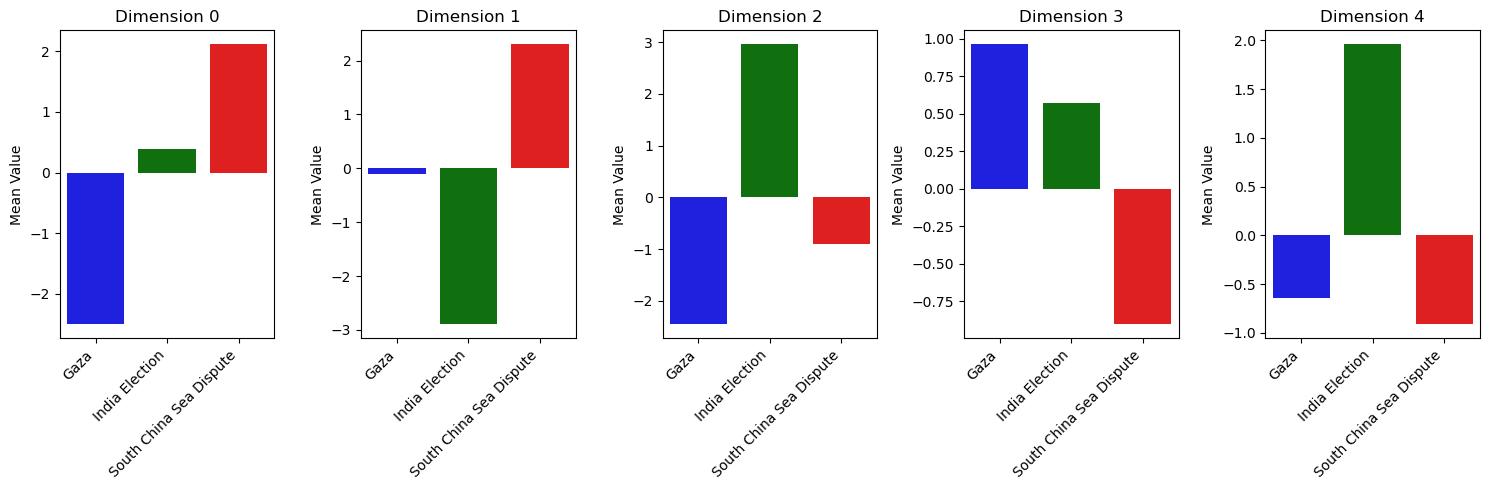

In [13]:
# plot 5 subplot, each plot for one dimension and all topics, y-axis is the mean value of the dimension
import matplotlib.pyplot as plt
import seaborn as sns

color_mapping = {
    "Gaza": "blue",
    "India Election": "green",
    "South China Sea Dispute": "red",
}

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    colors = [color_mapping[x] for x in topic_mean.index]
    sns.barplot(
        x=topic_mean.index,
        y=topic_mean.iloc[:, i],
        ax=axs[i],
        palette=colors,
        hue=topic_mean.index,
    )
    axs[i].set_title("Dimension " + str(i))
    axs[i].set_xticklabels(
        axs[i].get_xticklabels(), rotation=45, horizontalalignment="right"
    )
    axs[i].set_ylabel("Mean Value")
    axs[i].set_xlabel("")
plt.tight_layout()
plt.show()

In [14]:
get_intersection(lv, "d0", 3)

1 {'E'} {'C'}
3 {'E'} {'A'}
5 {'E'} {'A'}
6 {'E'} {'A', 'D'}
7 {'E'} {'B', 'C'}
8 {'E'} {'C'}
10 {'E'} {'A'}
13 {'E'} {'D'}
14 {'E'} {'B'}
16 {'B'} {'A'}
23 {'B'} {'A'}
25 {'B'} {'A'}
30 {'B'} {'A'}
33 {'B'} {'A'}


In [15]:
get_intersection(lv, "d0", 4)

1 {'E'} {'D', 'C'}
3 {'E'} {'A', 'D'}


In [16]:
get_intersection(lv, "d0", 8)

1 {'E'} {'D', 'B', 'C'}
3 {'E'} {'A', 'D'}


In [17]:
get_intersection(lv, "d0", 9)

3 {'E'} {'A', 'D'}


## d0: Humanitarian impact and casualties/Gaza"

In [18]:
get_intersection(lv, "d1", 3)

3 {'D'} {'E'}
32 {'A'} {'B'}
40 {'D', 'B'} {'A'}
43 {'D'} {'A'}
44 {'E'} {'C'}
46 {'D'} {'C'}
47 {'D', 'B'} {'A', 'C'}
49 {'D'} {'C'}
50 {'D'} {'A', 'C'}
56 {'D'} {'A', 'C'}
57 {'D'} {'A'}
60 {'A'} {'B'}
61 {'A'} {'B'}
62 {'A'} {'B'}
63 {'A'} {'B'}
67 {'A'} {'B'}
68 {'A'} {'B'}
73 {'A'} {'B'}
74 {'A'} {'B'}
78 {'A'} {'B'}
80 {'A', 'C'} {'E'}


In [19]:
get_intersection(lv, "d1", 33)

32 {'A'} {'B'}
40 {'C', 'D', 'B'} {'A'}
61 {'A'} {'B'}
62 {'A'} {'B'}
73 {'A'} {'B'}
74 {'A'} {'B'}


In [20]:
get_intersection(lv, "d1", 34)

32 {'A'} {'B'}


## d1: "political statements or negotiations"

In [21]:
get_intersection(lv, "d2", 3)

3 {'E'} {'A'}
5 {'E'} {'A'}
32 {'A'} {'B'}
38 {'A'} {'E'}
39 {'A', 'C'} {'D'}
40 {'A'} {'D'}
41 {'A'} {'D'}
42 {'A'} {'D'}
44 {'C'} {'E'}
46 {'C'} {'D'}
47 {'A'} {'D'}
49 {'C'} {'D'}
51 {'A'} {'D'}
59 {'A', 'C'} {'D'}
80 {'B'} {'E'}


In [21]:
get_intersection(lv, "d2", 30)

38 {'A'} {'D', 'E'}
39 {'A', 'E', 'C'} {'D'}
40 {'A'} {'D'}
41 {'A', 'B'} {'D'}
42 {'A', 'B', 'C'} {'D'}
44 {'B', 'C'} {'E'}
46 {'B', 'C'} {'D'}
47 {'A', 'B'} {'D'}
59 {'A', 'C'} {'D'}


In [22]:
get_intersection(lv, "d2", 40)

38 {'A'} {'E', 'D'}
40 {'A'} {'D'}
42 {'A', 'C', 'B'} {'D'}
46 {'C', 'B'} {'D'}
47 {'A', 'B'} {'D'}
59 {'A', 'C'} {'D'}


In [23]:
get_intersection(lv, "d2", 45)

38 {'A'} {'E', 'D'}
40 {'A', 'C'} {'D'}
46 {'C', 'B'} {'D'}


In [24]:
get_intersection(lv, "d2", 50)

38 {'A'} {'E', 'D'}
40 {'A', 'C'} {'D'}


In [25]:
get_intersection(lv, "d2", 55)

40 {'A', 'C'} {'D'}


## d2: "Political alliances, election results, India"

In [18]:
get_intersection(lv, "d3", 1)

1 {'B'} {'E'}
2 {'A'} {'E'}
3 {'A'} {'E'}
4 {'D'} {'E'}
5 {'E'} {'A'}
6 {'A'} {'E'}
7 {'B'} {'E'}
8 {'D'} {'E'}
9 {'A'} {'D'}
12 {'A'} {'E'}
13 {'D'} {'E'}
15 {'A'} {'B'}
16 {'A'} {'B'}
18 {'A'} {'B'}
23 {'A'} {'B'}
32 {'A'} {'B'}
48 {'A'} {'E'}
51 {'A'} {'D'}
80 {'C'} {'E'}


In [26]:
get_intersection(lv, "d3", 3)

1 {'B'} {'E', 'D'}
2 {'A'} {'E', 'B'}
3 {'A'} {'E'}
4 {'D'} {'E'}
5 {'E'} {'A'}
6 {'A'} {'E'}
7 {'B'} {'E'}
8 {'D'} {'E'}
9 {'A'} {'E', 'D'}
12 {'A'} {'E'}
13 {'D'} {'E'}
16 {'A'} {'B'}
23 {'A'} {'B'}
32 {'A'} {'B'}
48 {'A'} {'E'}
51 {'A'} {'D'}
80 {'C'} {'E'}


In [27]:
get_intersection(lv, "d3", 17)

3 {'A'} {'E'}
8 {'C', 'D'} {'E'}
9 {'A'} {'E', 'D'}
12 {'A', 'D'} {'E'}
13 {'D'} {'E'}
48 {'A'} {'E', 'B'}


In [28]:
get_intersection(lv, "d3", 20)

48 {'A'} {'E', 'B'}


In [29]:
get_intersection(lv, "d3", 28)

48 {'A'} {'E', 'B'}


## d3: "Official statements and reports"

In [19]:
get_intersection(lv, "d4", 2)

1 {'E'} {'C'}
2 {'E'} {'A'}
3 {'E'} {'A'}
4 {'E'} {'A'}
5 {'E'} {'A'}
7 {'E'} {'C'}
8 {'E'} {'C'}
9 {'E'} {'A'}
10 {'E'} {'A'}
11 {'E'} {'B'}
12 {'E'} {'D'}
13 {'E'} {'D'}
14 {'E'} {'A'}
15 {'B'} {'A'}
24 {'B'} {'A'}
27 {'B'} {'A'}
30 {'B'} {'A'}
31 {'B'} {'A'}
32 {'B'} {'A'}
33 {'B'} {'A'}
34 {'B'} {'A'}
38 {'E'} {'D'}
39 {'E', 'B'} {'D'}
40 {'A'} {'D'}
41 {'E'} {'D'}
42 {'E'} {'D'}
46 {'E', 'C'} {'D'}
47 {'A', 'E'} {'D'}
51 {'D'} {'A'}
80 {'E'} {'B'}


In [30]:
get_intersection(lv, "d4", 3)

1 {'E', 'D'} {'C', 'B'}
2 {'E'} {'A'}
4 {'E'} {'A', 'D'}
7 {'E'} {'C'}
8 {'E'} {'C', 'D'}
12 {'E'} {'A', 'D'}
27 {'B'} {'A'}
30 {'B'} {'A'}
31 {'B'} {'A'}
32 {'B'} {'A'}
33 {'B'} {'A'}
34 {'B'} {'A'}
51 {'D'} {'A'}
80 {'E'} {'C', 'B'}


In [31]:
get_intersection(lv, "d4", 5)

1 {'E', 'D'} {'C', 'B'}
2 {'E'} {'A'}
32 {'B'} {'A'}
80 {'E'} {'C', 'B'}


In [20]:
get_intersection(lv, "d4", 19)

1 {'D', 'E'} {'A', 'B', 'C'}
2 {'E'} {'A'}


In [32]:
get_intersection(lv, "d4", 20)

1 {'E', 'D'} {'A', 'C', 'B'}
2 {'E'} {'A'}


In [33]:
get_intersection(lv, "d4", 21)

1 {'E', 'D'} {'A', 'C', 'B'}


## d4: United Nations

# Create plot

In [34]:
import plotly.graph_objs as go
import pandas as pd
import json
import numpy as np
from sklearn.manifold import TSNE

pd.set_option("mode.copy_on_write", True)


def extract_summary(file):
    with open(file) as f:
        data = json.load(f)
    # Initialize a list to store the extracted values
    summary = []
    for item in data:
        if "summary" in item:
            s = item["summary"]
            summary.append(s)
    return summary


latent_vectors = pd.read_csv(
    "/Users/minlingzhou/Library/CloudStorage/OneDrive-DukeUniversity/vc/Summer/NarrativeNexus/data/latent_vector/latent_vectors_5.csv",
    header=None,
)

In [35]:
latent_vectors.rename(
    columns={0: "d0", 1: "d1", 2: "d2", 3: "d3", 4: "d4"}, inplace=True
)

In [36]:
v_2d_df = pd.DataFrame(latent_vectors)

v_2d_df["topic"] = (
    ["Gaza"] * 100
    + ["India Election"] * 100
    + ["South China Sea Dispute"] * 100
    + ["India Election"] * 100
    + ["Gaza"] * 100
    + ["South China Sea Dispute"] * 100
)

# read the summary from json file
summary = []
file_list = pd.read_csv(
    "/Users/minlingzhou/Library/CloudStorage/OneDrive-DukeUniversity/vc/Summer/NarrativeNexus/data/meta_data/QnA_file_list.csv"
)
for file in file_list["file_name"]:
    s = extract_summary(
        "/Users/minlingzhou/Library/CloudStorage/OneDrive-DukeUniversity/vc/Summer/NarrativeNexus/data/QnA_data/"
        + file
    )
    summary = summary + s
v_2d_df["summary"] = summary


# Function to format summaries for hover text
def format_summary(text):
    return text.replace("\n", "<br>")


v_2d_df["formatted_summary"] = v_2d_df["summary"].apply(format_summary)

# Plot using Plotly
# Create a color mapping for languages
color_map = {
    "Gaza": "blue",
    "South China Sea Dispute": "red",
    "India Election": "green",
}
v_2d_df["color"] = v_2d_df["topic"].map(color_map)

# Create a symbol mapping for languages
symbol_map = {
    "Gaza": "circle",
    "South China Sea Dispute": "x",
    "India Election": "triangle-up",
}

v_2d_df["symbol"] = v_2d_df["topic"].map(symbol_map)

# Create traces for each topic
traces = []
for topic in v_2d_df["topic"].unique():
    df = v_2d_df[v_2d_df["topic"] == topic]
    trace = go.Scatter(
        x=df["d4"],
        y=df["d0"],
        mode="markers",
        name=topic,
        marker=dict(color=color_map[topic], symbol=symbol_map[topic], size=6),
        customdata=df[["formatted_summary"]],
        # hovertemplate="<b>%{customdata[0]}</b><extra></extra>",
        hoverinfo="none",
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title="Latent Vector Visualization of News Articles",
    xaxis=dict(title="Dimension 4"),
    yaxis=dict(title="Dimension 0"),
    showlegend=True,
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Customize the hover template to instruct user to hover
# fig.update_traces(
#    hovertemplate="<b>Hover over a point to see the summary</b><extra></extra>",
#    customdata=v_2d_df[["formatted_summary"]].values,
# )
# Update layout to adjust the width of the scatter plot
# fig.update_layout(width=1000)  # Set the width in pixels

# Save the plot as an HTML file with embedded JavaScript and CSS
html_content = f"""
<html>
<head>
    <title>Interactive Plot</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <style>
        #summary-box {{
            position: absolute;
            top: 10px;
            right: 10px;
            width: 30vw;
            max-height: 98vh;
            overflow-y: auto;
            background-color: white;
            border: 1px solid black;
            padding: 10px;
            z-index: 1000;
            white-space: pre-line;
        }}
    </style>
</head>
<body>
    <div id="plot">{fig.to_html(full_html=False, include_plotlyjs='cdn')}</div>
    <div id="summary-box">Hover over a point to see the summary here.</div>
    <script>
        document.addEventListener('DOMContentLoaded', function() {{
            const plotDiv = document.getElementById('plot');
            const plotElement = plotDiv.querySelector('.js-plotly-plot');
            const newWidth = window.innerWidth * 2 / 3;
            Plotly.relayout(plotElement, 'width', newWidth);
            plotElement.on('plotly_hover', function(data) {{
                if(data.points.length > 0) {{
                    const summary = data.points[0].customdata[0];
                    document.getElementById('summary-box').innerHTML = summary;
                }}
            }});
            plotElement.on('plotly_unhover', function(data) {{
                document.getElementById('summary-box').innerHTML = 'Hover over a point to see the summary here.';
            }});
            
        }});
    </script>
</body>
</html>
"""

# Save the HTML content to a file
with open("d_0_4_interactive_plot_5.html", "w") as f:
    f.write(html_content)